In [1]:
import mne
import numpy as np
import matplotlib.pyplot as plt


In [2]:
file_path = 'h01.edf'
raw = mne.io.read_raw_edf(file_path, preload=True)

# Get basic information about the file
info = raw.info
channels = raw.ch_names
data_shape = raw.get_data().shape

info, channels, data_shape

Extracting EDF parameters from d:\Schzo\h01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 231249  =      0.000 ...   924.996 secs...


(<Info | 8 non-empty values
  bads: []
  ch_names: Fp2, F8, T4, T6, O2, Fp1, F7, T3, T5, O1, F4, C4, P4, F3, C3, ...
  chs: 19 EEG
  custom_ref_applied: False
  highpass: 0.0 Hz
  lowpass: 125.0 Hz
  meas_date: 2003-06-23 16:14:37 UTC
  nchan: 19
  projs: []
  sfreq: 250.0 Hz
  subject_info: 1 item (dict)
 >,
 ['Fp2',
  'F8',
  'T4',
  'T6',
  'O2',
  'Fp1',
  'F7',
  'T3',
  'T5',
  'O1',
  'F4',
  'C4',
  'P4',
  'F3',
  'C3',
  'P3',
  'Fz',
  'Cz',
  'Pz'],
 (19, 231250))

In [3]:
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage)

Measurement date,"June 23, 2003 16:14:37 GMT"
Experimenter,Unknown
Participant,DJZ
Digitized points,22 points
Good channels,19 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,250.00 Hz
Highpass,0.00 Hz
Lowpass,125.00 Hz


In [4]:
iir_params = {'order': 2, 'ftype': 'butter'}

# Apply the filter
raw_filtered = raw.copy().filter(l_freq=0.5, h_freq=50, method='iir', iir_params=iir_params)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 8 (effective, after forward-backward)
- Cutoffs at 0.50, 50.00 Hz: -6.02, -6.02 dB



Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 19 components
Fitting ICA took 1.7s.


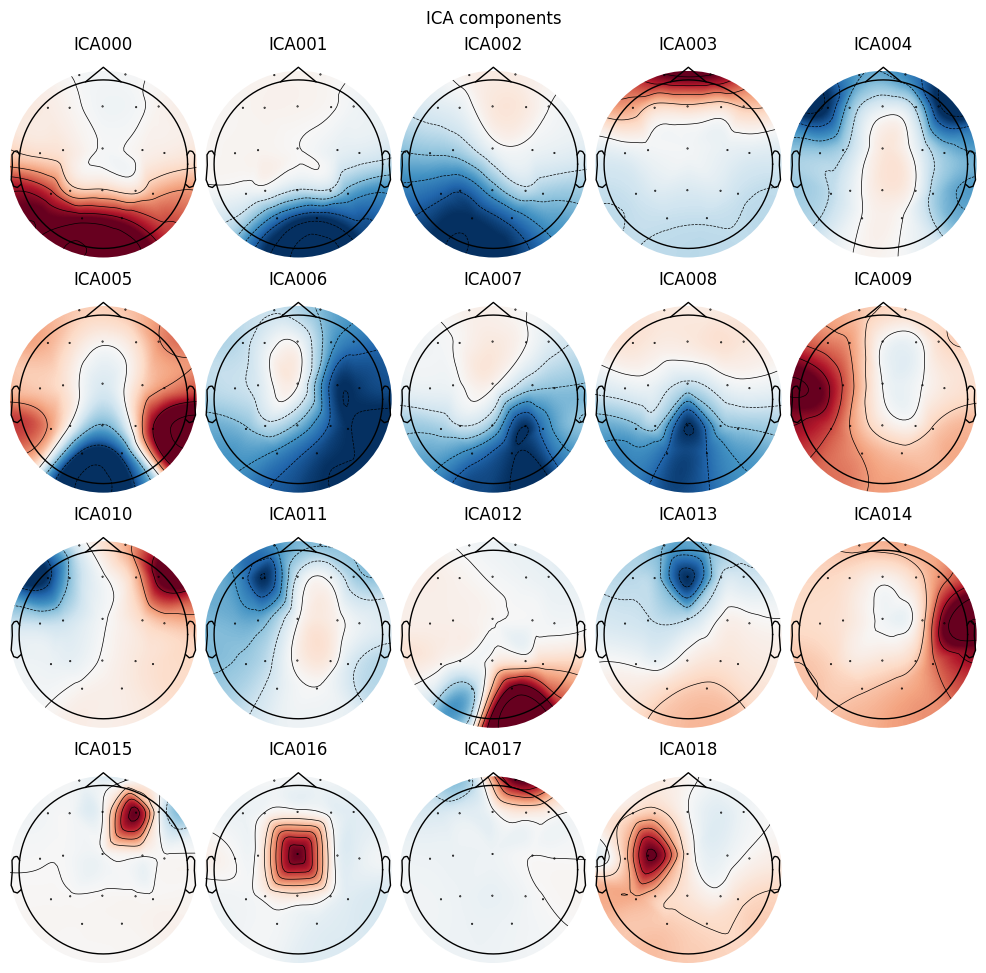

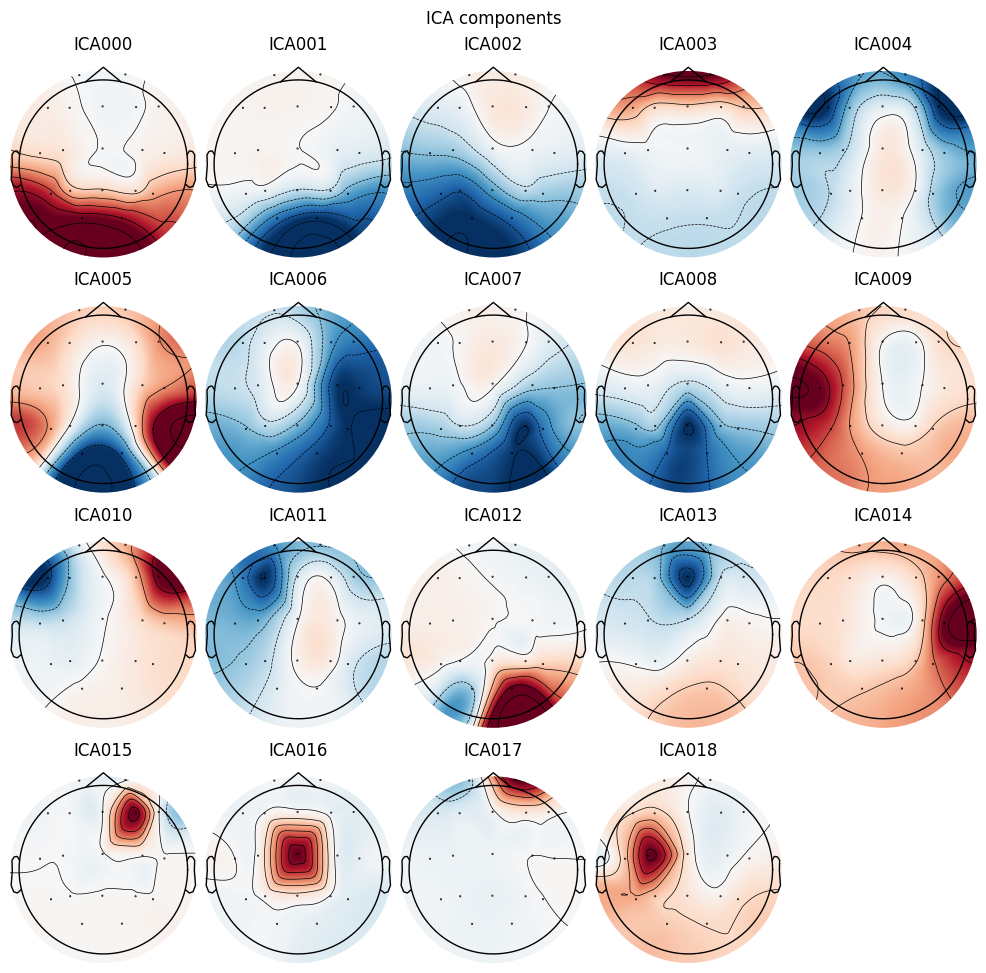

In [5]:
ica=mne.preprocessing.ICA(n_components=19,random_state=0)
ica.fit(raw_filtered.copy())
ica.plot_components(outlines='head')

In [6]:
ica.exclude=[0,3,9,10,12,14,15,17]
raw_cleaned = raw_filtered.copy()
new_raw=ica.apply(raw_cleaned,exclude=ica.exclude)

Applying ICA to Raw instance
    Transforming to ICA space (19 components)
    Zeroing out 8 ICA components
    Projecting back using 19 PCA components


In [7]:
data = raw._data * 1e6
sf = raw.info['sfreq']
chan = raw.ch_names

# Let's have a look at the data
print('Chan =', chan)
print('Sampling frequency =', sf, 'Hz')
print('Data shape =', data.shape)

Chan = ['Fp2', 'F8', 'T4', 'T6', 'O2', 'Fp1', 'F7', 'T3', 'T5', 'O1', 'F4', 'C4', 'P4', 'F3', 'C3', 'P3', 'Fz', 'Cz', 'Pz']
Sampling frequency = 250.0 Hz
Data shape = (19, 231250)


Using matplotlib as 2D backend.


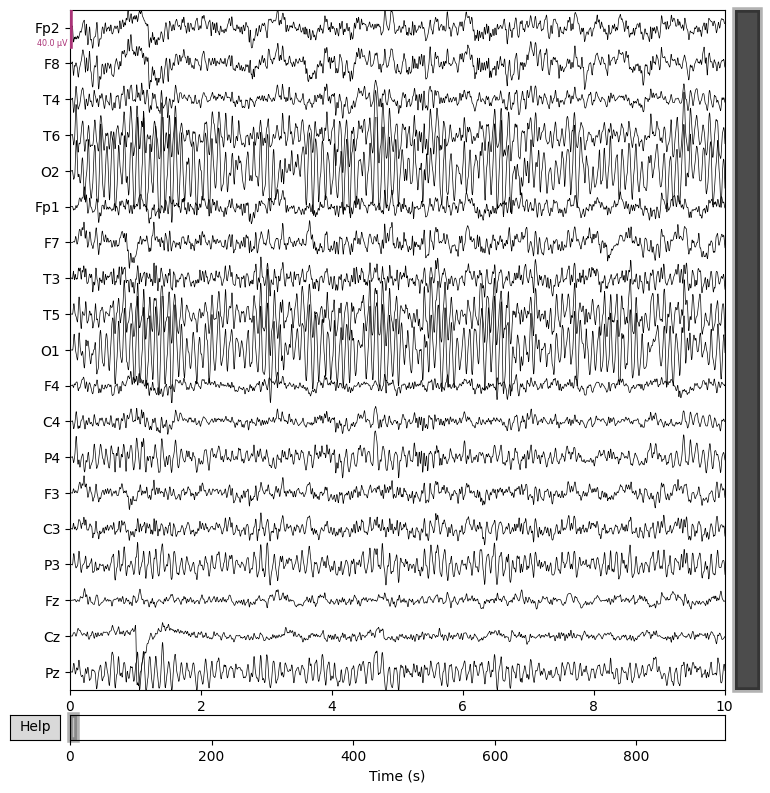

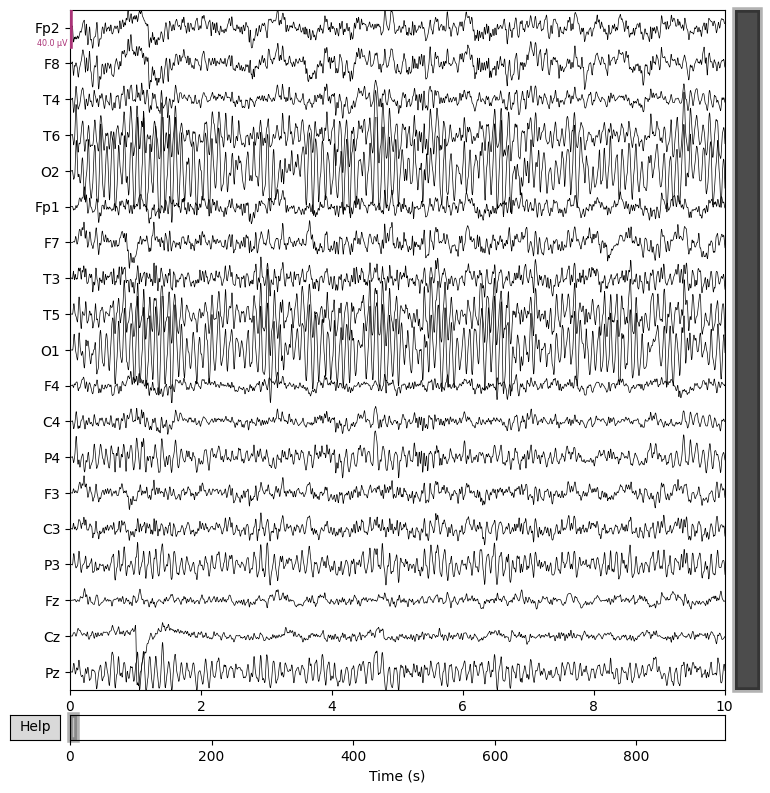

In [8]:
raw_filtered.plot()

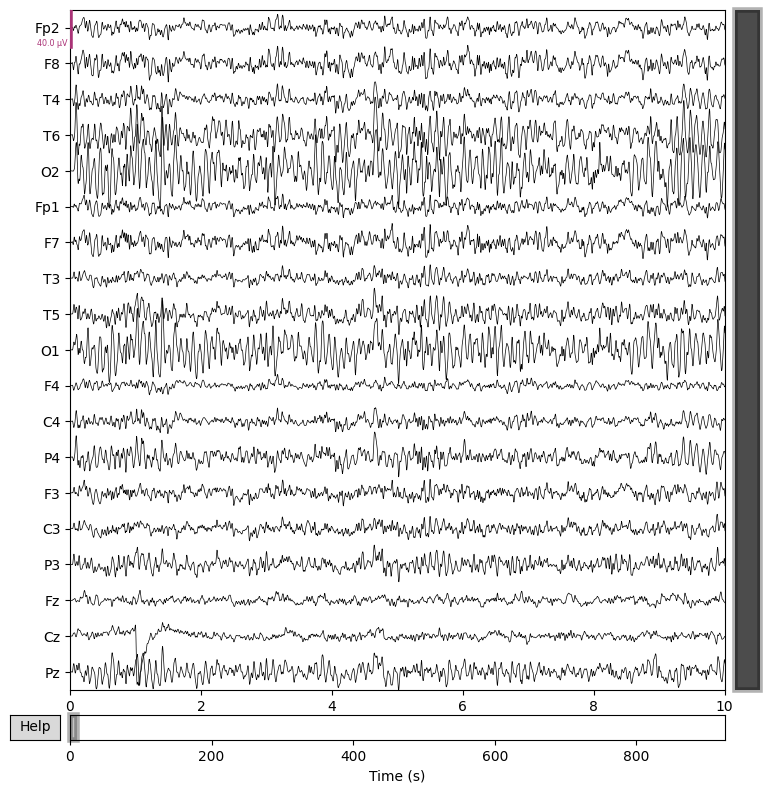

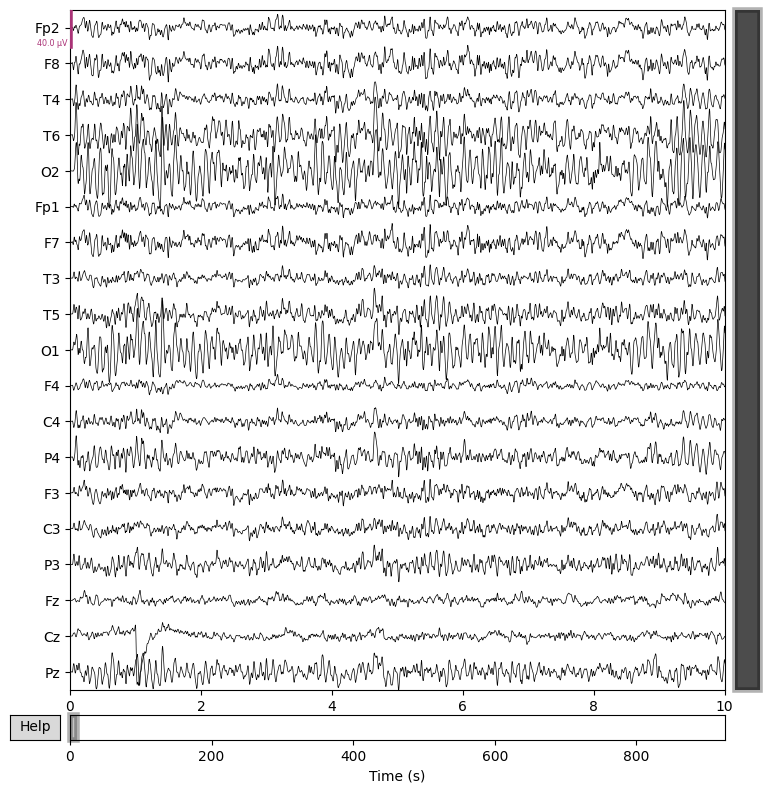

In [9]:
new_raw.plot()

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_17932\4098284104.py:2: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  raw_filtered.pick_channels(selected_channels).plot_psd()
c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\mne\viz\utils.py:165: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


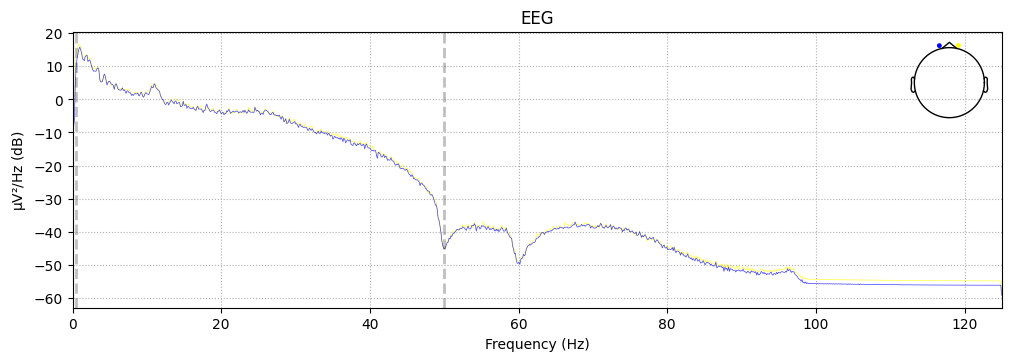

In [10]:
selected_channels = ['Fp1', 'Fp2']
raw_filtered.pick_channels(selected_channels).plot_psd()

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_17932\3587599604.py:1: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  new_raw.pick_channels(selected_channels).plot_psd()
c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\mne\viz\utils.py:165: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


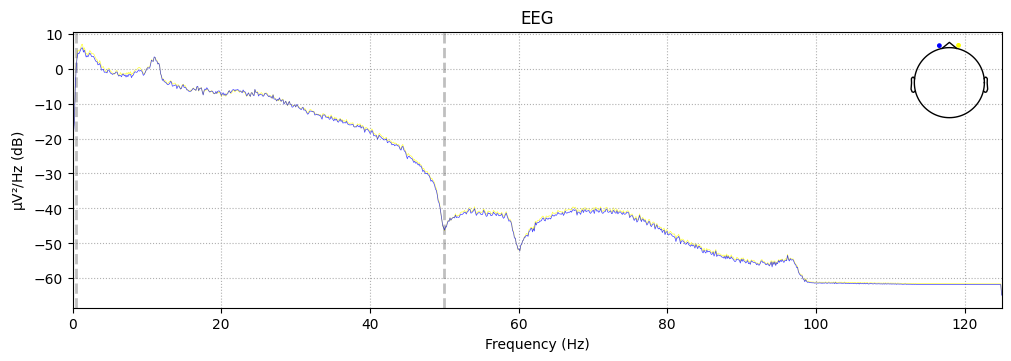

In [11]:
new_raw.pick_channels(selected_channels).plot_psd()

In [12]:
channel_indices = []
for ch_name in ['Fp1', 'Fp2']:
    try:
        channel_indices.append(raw.ch_names.index(ch_name))
    except ValueError:
        print(f"Channel {ch_name} not found.")

# 从原始数据中提取指定通道的数据
select_data = raw.get_data(picks=channel_indices)
print(select_data)

[[2.5e-09 2.5e-09 2.5e-09 ... 2.5e-09 2.5e-09 2.5e-09]
 [2.5e-09 2.5e-09 2.5e-09 ... 2.5e-09 2.5e-09 2.5e-09]]


In [13]:
select_data.shape

(2, 231250)

In [14]:
time_span=30

In [15]:
eeg_fp1 = select_data[0, :]
eeg_fp2 = select_data[1, :]

In [16]:
segments_fp1 = [eeg_fp1[i: i + time_span*250] for i in range(0, len(eeg_fp1), time_span*250)]
segments_fp2 = [eeg_fp2[i: i + time_span*250] for i in range(0, len(eeg_fp2), time_span*250)]
# print(segments_fp1)
valid_segments_fp1 = []
valid_segments_fp2 = []
for (seg_fp1, seg_fp2) in zip(segments_fp1, segments_fp2):
    print(len(seg_fp1), len(seg_fp2))
    if (len(seg_fp1) == len(seg_fp2) and len(seg_fp1) == time_span*250):
        valid_segments_fp1.append(seg_fp1)
        valid_segments_fp2.append(seg_fp2)

7500 7500
7500 7500
7500 7500
7500 7500
7500 7500
7500 7500
7500 7500
7500 7500
7500 7500
7500 7500
7500 7500
7500 7500
7500 7500
7500 7500
7500 7500
7500 7500
7500 7500
7500 7500
7500 7500
7500 7500
7500 7500
7500 7500
7500 7500
7500 7500
7500 7500
7500 7500
7500 7500
7500 7500
7500 7500
7500 7500
6250 6250


In [22]:
features_all = []
for (seg_fp1, seg_fp2) in zip(valid_segments_fp1, valid_segments_fp2):
    features_fp1 = np.abs(np.fft.fft(seg_fp1))[:64]
    features_fp2 = np.abs(np.fft.fft(seg_fp2))[:64]
    features = np.concatenate((features_fp1, features_fp2), axis=0)
    features_all.append(features)
    # print(features)
    print(features_fp1)
    print(type(features_fp1))
    print(features_fp1.shape)


[2.36601572e-04 2.52985279e-04 1.63941296e-04 2.15711556e-04
 7.56219654e-05 6.59236983e-04 9.21443819e-04 7.15931490e-04
 8.05656486e-04 1.21472426e-03 1.06200684e-03 1.19436197e-03
 1.42330545e-03 1.16184065e-03 1.58424329e-03 2.01948954e-03
 4.07534916e-03 1.94992214e-03 2.90118288e-03 1.94855733e-03
 1.44109865e-03 2.17491800e-03 2.80081229e-03 3.13460812e-03
 1.90799214e-03 5.77362385e-04 4.16845824e-03 1.67282819e-03
 2.79299603e-03 2.72637644e-03 2.85373437e-03 4.16061659e-03
 1.59911735e-03 4.42314759e-03 3.23135788e-03 2.77505825e-03
 1.89456574e-03 1.59248899e-03 1.96878837e-03 2.34015811e-03
 3.30620851e-03 3.52836447e-03 7.46164413e-04 4.63927672e-03
 1.29334894e-03 1.47552100e-03 1.80389420e-03 3.08502034e-03
 1.64430133e-03 4.02084884e-03 2.56668436e-03 3.35215052e-03
 2.22571712e-03 2.74419261e-03 1.08782294e-03 1.71199099e-03
 2.18621438e-03 1.32834270e-03 1.90718608e-03 2.79595867e-03
 3.50007878e-03 1.70400356e-03 2.81513256e-03 1.03693449e-03]
<class 'numpy.ndarray'>

In [23]:
features.shape

(128,)

In [ ]:
print(features_fp1)
print(len(features_fp1))

print(features_fp2)
print(len(features_fp2))

print(features)

[1.07893693e-04 3.43045801e-05 1.68468441e-04 3.39038779e-04
 3.42286856e-04 6.20090091e-04 9.37245103e-04 1.33095979e-03
 1.23589654e-03 1.21215995e-03 1.06911550e-03 1.83140825e-03
 1.02913222e-03 1.62988567e-03 1.80400747e-03 1.02212508e-03
 3.21393003e-03 2.23843234e-03 2.87994501e-03 2.79855787e-03
 1.28273014e-03 3.31241911e-03 1.96266923e-03 4.12836738e-03
 3.35226524e-03 5.90164893e-04 4.09053441e-03 1.15268183e-03
 3.16990934e-03 2.87280874e-03 3.40969850e-03 2.05560714e-03
 2.89226070e-03 6.89165876e-04 2.68250610e-03 3.77779771e-03
 1.39091022e-03 3.02683982e-03 2.67303908e-03 2.26745464e-03
 2.90248596e-03 3.42409140e-03 4.50650911e-03 8.14448372e-04
 1.47347511e-03 2.51461452e-03 3.08134653e-03 1.47566127e-03
 8.14524372e-04 1.19273902e-03 2.66379477e-03 2.15080477e-03
 1.01890330e-03 5.34984110e-04 9.10487054e-04 3.04447893e-04
 3.06381558e-03 3.33154073e-03 2.09996137e-03 1.29488681e-03
 3.07116718e-03 2.76449210e-03 5.79046583e-04 3.12364746e-03]
64
[0.00054979 0.000668

In [ ]:
segments = [select_data[i:i+250 * time_span] for i in range(0, len(data), 250)]

In [ ]:
features = np.array([np.fft.fft(segment)[:64] for segment in segments])

In [ ]:
np.shape(segments)

(1, 2, 231250)